# 03 – Image Annotation with OpenCV

[![Previous Module – ](https://img.shields.io/badge/Previous_Module-Image_Manipulation-blue)](https://github.com/Adityeah18/opencv/tree/main/02)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1PftgZipld54pHfCc34y1qtV-gqzS6Uwy?usp=sharing)



In this module, we learn how to annotate images using OpenCV...

In this module, we learn how to annotate images using OpenCV. This includes adding lines, shapes, and text to mark regions of interest (ROIs), highlight specific areas, or label content. Annotation is essential in computer vision workflows for:

- Visual debugging of model predictions
- Creating annotated datasets for training
- Building interactive image tools or GUIs

We will cover how to:

- Draw **lines**, **circles**, and **rectangles**
- Add **text** annotations with font, size, and color
- Use proper **color handling** for display vs saving
- Save the annotated images to disk

>  A Python script version of this notebook is also available.


In [2]:
# Import required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


## 2. Reading the Image

We load the image in color mode (`cv2.IMREAD_COLOR`) even if the image looks grayscale, so that annotations (which use color) render correctly.


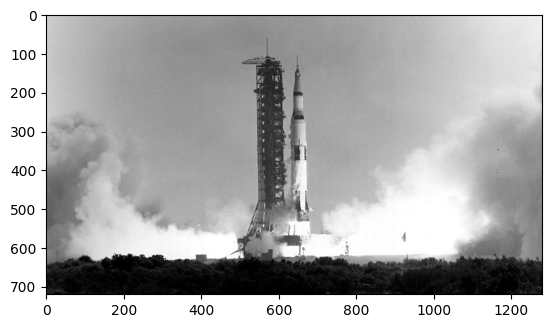

In [3]:
##Reading Image
image=cv2.imread("Apollo_11_Launch.jpg",cv2.IMREAD_COLOR)

#Diplaying image
plt.imshow(image)


## 3. Drawing a Line

Use `cv2.line()` to draw a line on the image.

```python
cv2.line(image, pt1, pt2, color, thickness)


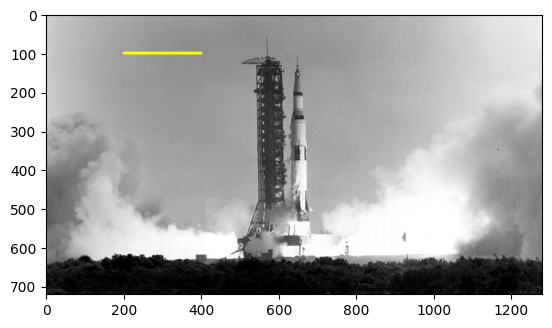

In [6]:
# Copy the image to preserve original
line_img=image.copy()

#img=cv2.line(img,start point1, end point2,color[, flags]);4 essential argumenst and non essentials flags
cv2.line(line_img,(200,100),(400,100),(0,255,255),thickness=5,lineType= cv2.LINE_AA) #,lineType= cv2.LINE_AA ;AA is anti- alising gives smooth eges to line

# Display the image (convert BGR to RGB)
plt.imshow(line_img[:,:,::-1])#To show line in color

## 4. Drawing a Circle

`cv2.circle()` is used to draw a circle on an image.

**Syntax:**
```python
cv2.circle(image, center, radius, color, thickness)


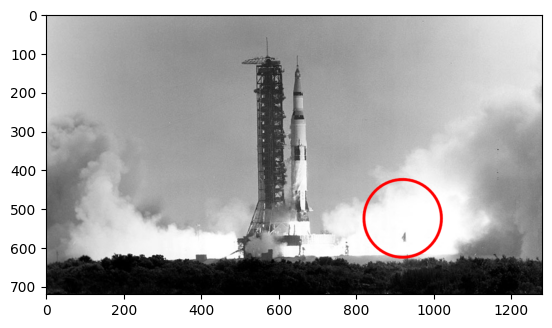

In [12]:
image_circle=image.copy()

#img=cv2.circle(img,center,radius,color[,flags]); 4 essential and non essential flags
cv2.circle(image_circle,(920,525),100,(0,0,255),thickness=5,lineType= cv2.LINE_AA)

plt.imshow(image_circle[:,:,::-1])


## 5. Drawing a Rectangle

`cv2.rectangle()` draws a rectangle between two opposite corners.

**Syntax:**
```python
cv2.rectangle(image, pt1, pt2, color, thickness) #thickness is flag


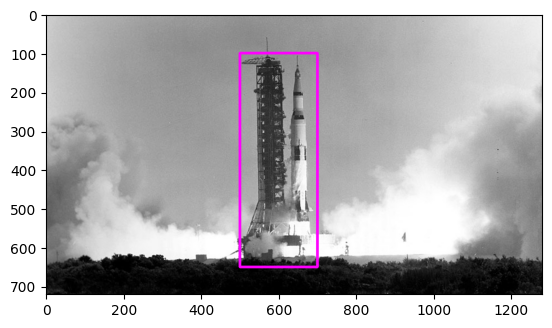

In [13]:
image_rectangle=image.copy()

#cv2.rectangle(img,pt1,pt2,color[, flags]) ;takes 4 essential arguments and nonessential flags
cv2.rectangle(image_rectangle,(500,100),(700,650),(255,0,255),thickness=5) #pt1 = tiop left vertex, point2 bottom right vertex of rectangle

plt.imshow(image_rectangle[:,:,::-1])


## 6. Adding Text to Images

`cv2.putText()` lets you place text on an image — useful for labeling, captions, or debugging.

**Syntax:**
```python
cv2.putText(image, text, org, fontFace, fontScale, color, thickness) #Thickness is flag


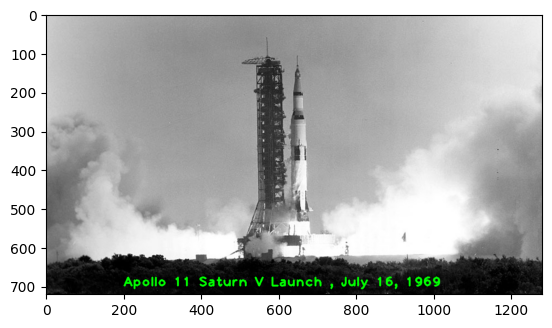

In [15]:
#cv2.putText(image,text str,text origin,font type,font size,color[, flaga]) putText takes 6 essentaila arguments and non essential flags like thickness

image_text=image.copy()

cv2.putText(image_text, #source image
            text="Apollo 11 Saturn V Launch , July 16, 1969", #text string
            org=(200,700), #Origin (start point (x,y))
            fontFace=cv2.FONT_HERSHEY_PLAIN,#font style
            fontScale=2.3,#Font size
            color=(0,255,0), #font color
            thickness=3,) #Font thickness

# Display the image
plt.imshow(image_text[:,:,::-1])

## 7. Saving Annotated Images

Use `cv2.imwrite(filename, image)` to save the annotated versions.

Since OpenCV uses BGR format, we reverse channels (`image[:, :, ::-1]`) if the image was displayed using RGB.


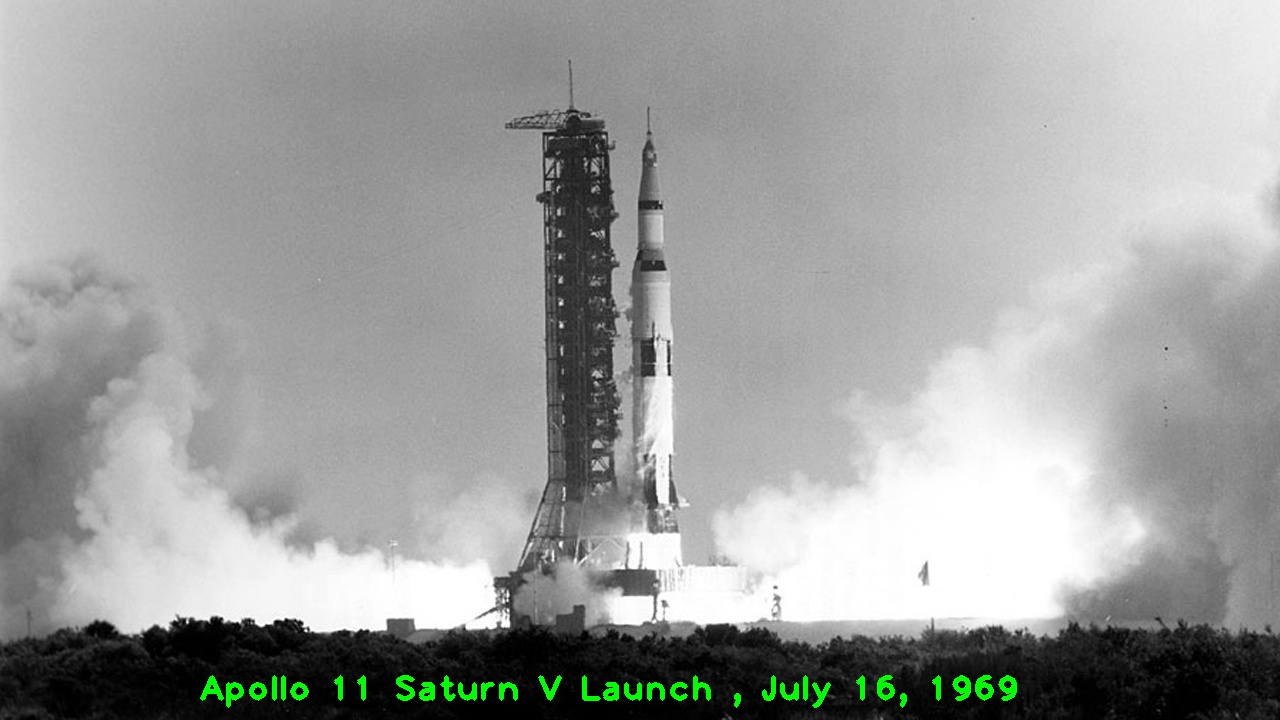

In [17]:
# Save all annotated images (convert RGB back to BGR for OpenCV)
cv2.imwrite("annotated_line.jpg", line_img)
cv2.imwrite("annotated_circle.jpg", image_circle)
cv2.imwrite("annotated_rectangle.jpg", image_rectangle)
cv2.imwrite("annotated_text.jpg", image_text)

#Displayingthe Annoted image
Image(filename="annotated_text.jpg")


>  **Note on Color Format When Saving vs. Displaying**

- OpenCV uses **BGR** format internally.
- `cv2.imwrite()` saves images in BGR format.
- However, tools like `IPython.display.Image()` and most OS image viewers interpret the saved file correctly and **display it with the right colors**, even if it’s in BGR.
- When using `matplotlib.pyplot.imshow()`, make sure to convert BGR to RGB using:
  ```python
  plt.imshow(image[:, :, ::-1])
